In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [38]:
#loadcsv file of crime
crime = pd.read_csv("C:\\Users\\Nik\\Downloads\\crime_data.csv")

In [39]:
#top 10 records of data set crime
crime.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [16]:
data.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [40]:
crime.rename(columns={'Unnamed: 0':'States'},inplace= True)

In [41]:
crime.head()

,States,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [43]:
#number which iis near to 1 is good 
corr = crime.corr()

In [21]:
corr

,Murder,Assault,UrbanPop,Rape
Murder,1.000000,0.801873,0.069573,0.563579
Assault,0.801873,1.000000,0.258872,0.665241
UrbanPop,0.069573,0.258872,1.000000,0.411341
Rape,0.563579,0.665241,0.411341,1.000000


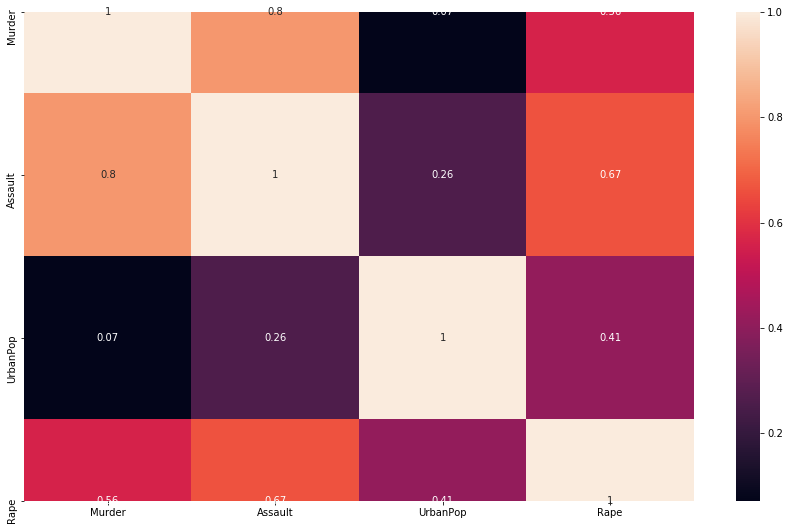

In [22]:
plt.figure(figsize=(15,9))

ax = sns.heatmap(corr,  annot=True)

plt.show()

In [23]:
# from correlation matrix we can chose the features pair (mostly>=60)

In [44]:
from sklearn.cluster import KMeans

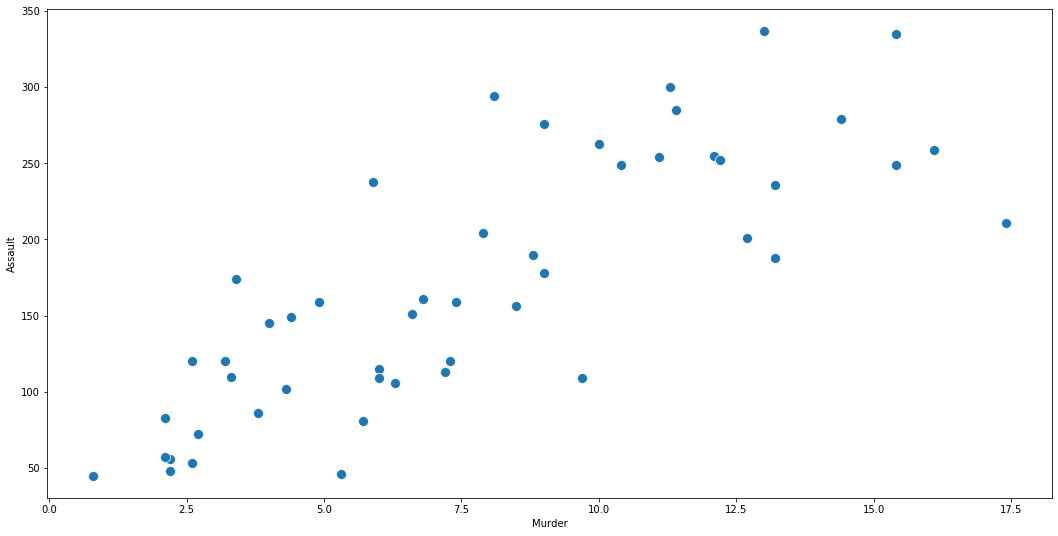

In [58]:
plt.figure(figsize=(18,9))# 18 is width of box and 9 is height of box

sns.scatterplot('Murder','Assault',data=crime,s=100)# s means size of dot

plt.show()

The number of clusters has to be be decided when k-means clustering is used unlike hierarchical clustering. Let's start with creating scree plot. Scree plot is a plot between WCSS (Within cluster sum of squares) and number of clusters. Without sound domain knowledge or in the scenarios with unclear motives, the scree plots help us decide the number of clusters to specify.

In [47]:
def ElbowMethod(data):
    wcss = list()
    for x in range(1,11):
        kmean = KMeans(x)
        y = kmean.fit(data)
        wcss.append(y.inertia_)
        
    return wcss

A fundamental step for any unsupervised algorithm is to determine the optimal number of clusters into which the data may be clustered. The Elbow Method is one of the most popular methods to determine this optimal value of k.

In [48]:

X = data.iloc[:,[1,2]].values

elbow = ElbowMethod(X)

In [49]:

elbow

[341242.6728,
 83705.35211822661,
 36346.08128571429,
 23960.783285714282,
 13664.661619047618,
 8490.02511111111,
 5338.85604040404,
 3191.486277777777,
 2369.3234206349202,
 1883.5392142857145]

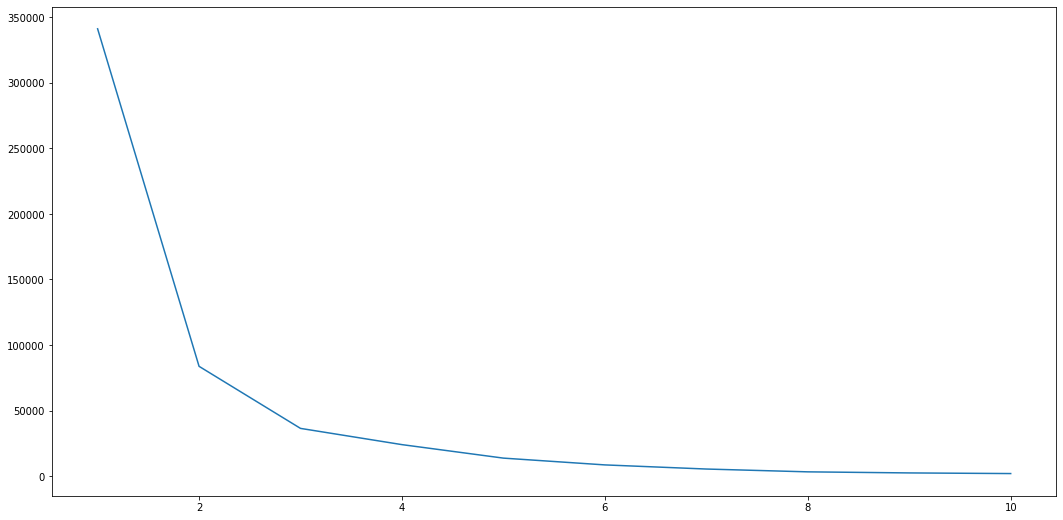

In [50]:
plt.figure(figsize=(18,9))

sns.lineplot(range(1,11),elbow)

plt.show()

In [33]:
# so, lets take 3 cluster for Murder and Assault 0,1,2

In [51]:
kmeans = KMeans(3)
yPred = kmeans.fit_predict(X)

yPred

array([2, 2, 2, 0, 2, 0, 1, 2, 2, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 0, 2,
       1, 2, 0, 1, 1, 2, 1, 0, 2, 2, 2, 1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 0])

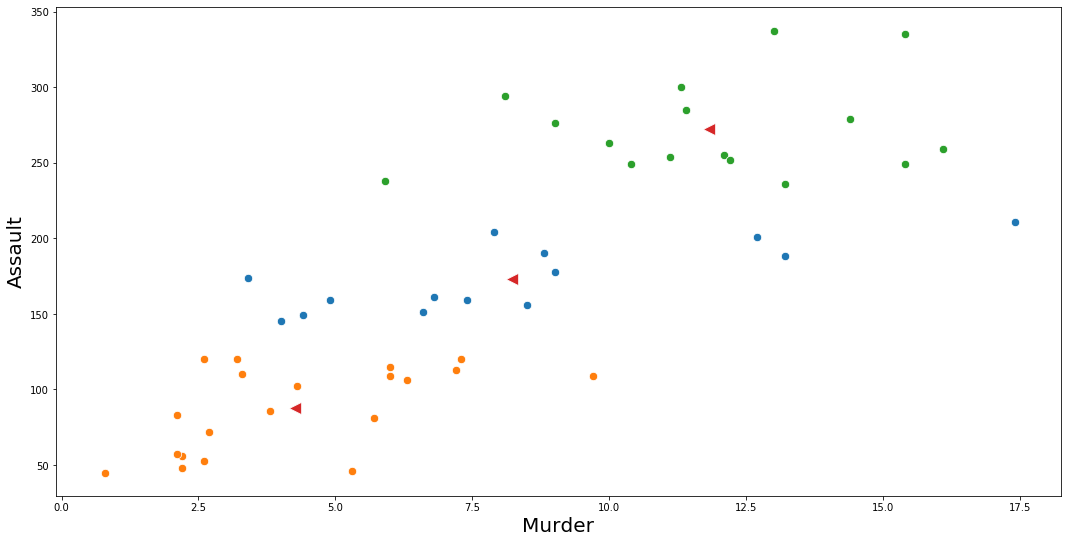

In [52]:
# plot scatter plot for the Murder and Assault

plt.figure(figsize=(18,9))

sns.scatterplot(X[yPred == 0,0],X[yPred==0,1],s=70)
sns.scatterplot(X[yPred == 1,0],X[yPred==1,1],s=70)
sns.scatterplot(X[yPred == 2,0],X[yPred==2,1],s=70)
#sns.scatterplot(X[yPred == 3,0],X[yPred==3,1],s=70)
#sns.scatterplot(X[yPred == 4,0],X[yPred==4,1],s=70)

sns.scatterplot(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=150,marker='<')


plt.xlabel('Murder',fontsize=20)
plt.ylabel('Assault',fontsize=20)
plt.show()


The above scatter shows a distribution of how the states are scattered and clusters are visible based on Murders and Assaults. And there is a positive correlation between occurrence of Murder and Assault in different states.